In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
'''%cd /content/drive/MyDrive/AI & Machine Learning/Deep Learning/ANN-Projects/cardio_dataset'''

'%cd /content/drive/MyDrive/AI & Machine Learning/Deep Learning/ANN-Projects/cardio_dataset'

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Reading the dataset**

'''.values: Once the CSV file is read using pd.read_csv(),
the .values attribute is used to get the values from the DataFrame.
This essentially converts the data from the DataFrame format to a NumPy array, which is a versatile numerical computing library in Python.'''

In [62]:
dataset=pd.read_csv('H:\My Drive\ANN\Regression\Heart risk level prediction\cardio_dataset.csv').values
print(dataset.shape)

(6644, 8)


# **Data and Target**

In [30]:
data=dataset[:,0:7]
target=dataset[:,7]

# **Scaling / Normalized**



In [31]:
#numerical features 0-1 athara value wlta gnnwa. 0-1 ma wenna onith na. podi range ekak unhm ati
# x-min / max-min
#check the note
# This is appling for data and targets (only regression problems).

In [32]:
from sklearn.preprocessing import MinMaxScaler #library ekak scaling wlt gnna.
'''The MinMaxScaler is used for scaling numerical data to a specific range, typically between 0 and 1.'''

target=np.reshape(target, (-1,1)) #scaler ekt danna raget eka 2d wdhta tynna oni. ekai mehema kare.
'''The target variable is reshaped using NumPy's reshape function.
The (-1, 1) argument indicates that the reshaped array should have one column, and the number of rows should be automatically
determined based on the size of the original array. This is a common step when dealing with machine learning algorithms
that expect a 2D array as the target variable.'''

scaler_data = MinMaxScaler(feature_range=(0,1)) #make a object, equention = x-min / max-min
scaler_target = MinMaxScaler() #make a object

#scaler_data.fit(data) #fit the data
#scaler_target.fit(target) #fit the target

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [33]:
print (data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


# **Why Scaling?**

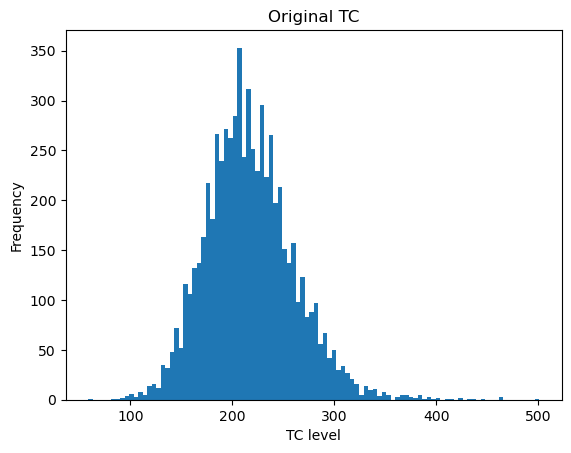

In [34]:
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

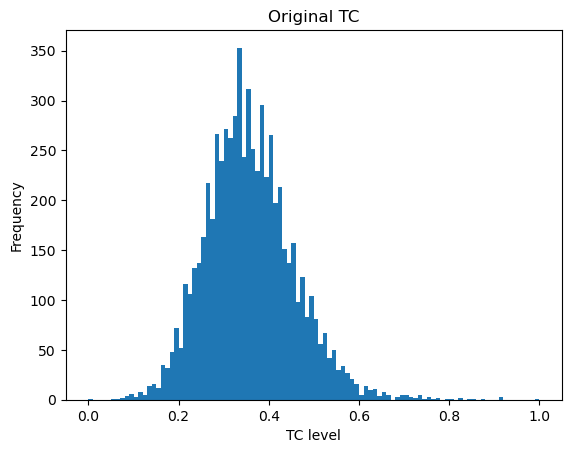

In [35]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

## **Other Scaling Methods**

> Indented block

> Indented block




## 1. Standard Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

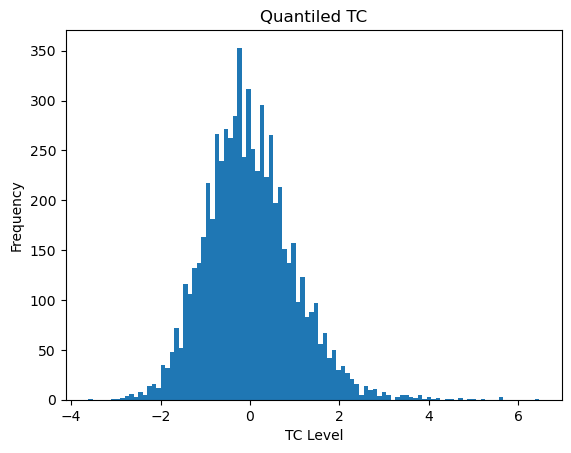

In [37]:
plt.hist(standard_scaled_data[:,2],bins=100)
plt.title('Quantiled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

This type of scaling removes mean and scale data to unit variance. It is defined by the formula
![image.png](attachment:image.png)
where mean is the mean of the training samples, and std is the standard deviation of the training samples. The best way to understand it is to look at it in practice. For that we use SciKit Learn and StandardScaler class:

## **Quantile Transformation**

As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution:

In [38]:
from sklearn.preprocessing import QuantileTransformer #values tika 0t center karala ganna puluwan meken.

qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed_data = qtrans.fit_transform(data)

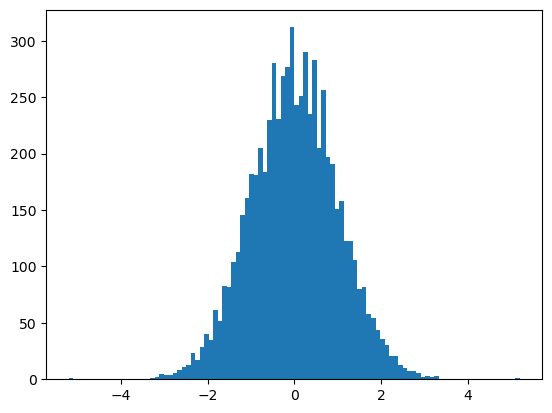

In [39]:
plt.hist(quantile_transformed_data[:,2],bins=100)
plt.show()

# **Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

# **FFNN Architecture**

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9941 (38.83 KB)
Trainable params: 9941 (

# **R2 Score**

In [42]:
#cant take accuracy for the regression problem , so caculate R2 score to get idea about model
#accuracy 1t lagai nam good wage. R2 ekath ekta lagai nam good.

In [43]:
from sklearn.metrics import r2_score
import keras
# Take r2 for accuracy in regresion problem 
class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self,epoch,logs=None): # can't change the name of the function
        predicted_result=model.predict(test_data)
        
        r2=r2_score(test_target,predicted_result)
        print('epoch ',epoch,'- r2 score:',r2)

# **Save Best Model**

[Full details at keras official site](https://www.tensorflow.org/guide/keras/custom_callback)

In [45]:
from keras.callbacks import ModelCheckpoint #modelcheckpoit= save model
checkpoit = ModelCheckpoint('models/model-{epoch:03d}.model', monitor='val_loss', save_best_only=True, mode='auto')

# **Train The Model**

In [46]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoit,CustomCallback()])

Epoch 1/200
151/167 [==========================>...] - ETA: 0s - loss: 0.0643 - mse: 0.0643 - mae: 0.1909INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  0 - r2 score: 0.010255233477559966
167/167 [==============================] - 4s 18ms/step - loss: 0.0611 - mse: 0.0611 - mae: 0.1855 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1052
Epoch 2/200
164/167 [============================>.] - ETA: 0s - loss: 0.0290 - mse: 0.0290 - mae: 0.1307INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  1 - r2 score: 0.03775075359817903
167/167 [==============================] - 8s 49ms/step - loss: 0.0289 - mse: 0.0289 - mae: 0.1305 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.1126
Epoch 3/200
151/167 [==========================>...] - ETA: 0s - loss: 0.0247 - mse: 0.0247 - mae: 0.1200INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  2 - r2 score: 0.05141373728151344
167/167 [==============================] - 2s 14ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1201 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1093
Epoch 4/200
164/167 [============================>.] - ETA: 0s - loss: 0.0239 - mse: 0.0239 - mae: 0.1179INFO:tensorflow:Assets written to: models\model-004.model\assets


INFO:tensorflow:Assets written to: models\model-004.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  3 - r2 score: 0.06813615212530644
167/167 [==============================] - 3s 16ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1177 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.1091
Epoch 5/200
166/167 [============================>.] - ETA: 0s - loss: 0.0231 - mse: 0.0231 - mae: 0.1156INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  4 - r2 score: 0.09876187180198659
167/167 [==============================] - 2s 14ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1156 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1085
Epoch 6/200
151/167 [==========================>...] - ETA: 0s - loss: 0.0224 - mse: 0.0224 - mae: 0.1143INFO:tensorflow:Assets written to: models\model-006.model\assets


INFO:tensorflow:Assets written to: models\model-006.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  5 - r2 score: 0.17978636856643415
167/167 [==============================] - 2s 13ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1140 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.0983
Epoch 7/200
162/167 [============================>.] - ETA: 0s - loss: 0.0202 - mse: 0.0202 - mae: 0.1067INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  6 - r2 score: 0.3428260963915206
167/167 [==============================] - 2s 14ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1063 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0868
Epoch 8/200
163/167 [============================>.] - ETA: 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.0974INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  7 - r2 score: 0.501640998082349
167/167 [==============================] - 3s 15ms/step - loss: 0.0170 - mse: 0.0170 - mae: 0.0973 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0706
Epoch 9/200
159/167 [===========================>..] - ETA: 0s - loss: 0.0152 - mse: 0.0152 - mae: 0.0919INFO:tensorflow:Assets written to: models\model-009.model\assets


INFO:tensorflow:Assets written to: models\model-009.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  8 - r2 score: 0.5842999816069829
167/167 [==============================] - 3s 16ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.0917 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0675
Epoch 10/200
164/167 [============================>.] - ETA: 0s - loss: 0.0130 - mse: 0.0130 - mae: 0.0837INFO:tensorflow:Assets written to: models\model-010.model\assets


INFO:tensorflow:Assets written to: models\model-010.model\assets


42/42 [==============================] - 0s 4ms/step
epoch  9 - r2 score: 0.6298660742130004
167/167 [==============================] - 3s 15ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0837 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0634
Epoch 11/200
154/167 [==========================>...] - ETA: 0s - loss: 0.0112 - mse: 0.0112 - mae: 0.0773INFO:tensorflow:Assets written to: models\model-011.model\assets


INFO:tensorflow:Assets written to: models\model-011.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  10 - r2 score: 0.6871852951167677
167/167 [==============================] - 3s 16ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0778 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0530
Epoch 12/200
157/167 [===========================>..] - ETA: 0s - loss: 0.0107 - mse: 0.0107 - mae: 0.0742INFO:tensorflow:Assets written to: models\model-012.model\assets


INFO:tensorflow:Assets written to: models\model-012.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  11 - r2 score: 0.7003807246489708
167/167 [==============================] - 3s 19ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0740 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0498
Epoch 13/200
159/167 [===========================>..] - ETA: 0s - loss: 0.0099 - mse: 0.0099 - mae: 0.0707INFO:tensorflow:Assets written to: models\model-013.model\assets


INFO:tensorflow:Assets written to: models\model-013.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  12 - r2 score: 0.7369430631876428
167/167 [==============================] - 2s 15ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0707 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0496
Epoch 14/200
165/167 [============================>.] - ETA: 0s - loss: 0.0091 - mse: 0.0091 - mae: 0.0668INFO:tensorflow:Assets written to: models\model-014.model\assets


INFO:tensorflow:Assets written to: models\model-014.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  13 - r2 score: 0.7555205662581503
167/167 [==============================] - 3s 16ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0668 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0435
Epoch 15/200
153/167 [==========================>...] - ETA: 0s - loss: 0.0086 - mse: 0.0086 - mae: 0.0651INFO:tensorflow:Assets written to: models\model-015.model\assets


INFO:tensorflow:Assets written to: models\model-015.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  14 - r2 score: 0.7662367304833937
167/167 [==============================] - 3s 17ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0652 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0440
Epoch 16/200
42/42 [==============================] - 0s 2ms/step loss: 0.0081 - mse: 0.0081 - mae: 0.
epoch  15 - r2 score: 0.763668381914669
167/167 [==============================] - 1s 6ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0616 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0420
Epoch 17/200
166/167 [============================>.] - ETA: 0s - loss: 0.0080 - mse: 0.0080 - mae: 0.0615INFO:tensorflow:Assets written to: models\model-017.model\assets


INFO:tensorflow:Assets written to: models\model-017.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  16 - r2 score: 0.7796574630254595
167/167 [==============================] - 2s 15ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0615 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0469
Epoch 18/200
167/167 [==============================] - ETA: 0s - loss: 0.0074 - mse: 0.0074 - mae: 0.0587INFO:tensorflow:Assets written to: models\model-018.model\assets


INFO:tensorflow:Assets written to: models\model-018.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  17 - r2 score: 0.7886820845951895
167/167 [==============================] - 3s 15ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0587 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0399
Epoch 19/200
42/42 [==============================] - 0s 2ms/step loss: 0.0076 - mse: 0.0076 - mae: 0.
epoch  18 - r2 score: 0.7878484124810162
167/167 [==============================] - 1s 6ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0590 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0406
Epoch 20/200
164/167 [============================>.] - ETA: 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0581INFO:tensorflow:Assets written to: models\model-020.model\assets


INFO:tensorflow:Assets written to: models\model-020.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  19 - r2 score: 0.7988682430029871
167/167 [==============================] - 3s 16ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0581 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0406
Epoch 21/200
42/42 [==============================] - 0s 2ms/step loss: 0.0072 - mse: 0.0072 - mae: 0.
epoch  20 - r2 score: 0.7943646308425529
167/167 [==============================] - 1s 6ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0567 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0426
Epoch 22/200
42/42 [==============================] - 0s 3ms/step loss: 0.0068 - mse: 0.0068 - mae: 
epoch  21 - r2 score: 0.7898180856585079
167/167 [==============================] - 1s 7ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0555 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0393
Epoch 23/200
42/42 [==============================] - 0s 2ms/step loss: 0.0068 - mse: 0.0068 - mae: 0.
epoch  22 - r2 score: 0.7884912801669935
167/167 [=======

INFO:tensorflow:Assets written to: models\model-025.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  24 - r2 score: 0.8025353683709062
167/167 [==============================] - 3s 16ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0538 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0385
Epoch 26/200
163/167 [============================>.] - ETA: 0s - loss: 0.0064 - mse: 0.0064 - mae: 0.0538INFO:tensorflow:Assets written to: models\model-026.model\assets


INFO:tensorflow:Assets written to: models\model-026.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  25 - r2 score: 0.8032019355208034
167/167 [==============================] - 3s 16ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0538 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0448
Epoch 27/200
161/167 [===========================>..] - ETA: 0s - loss: 0.0062 - mse: 0.0062 - mae: 0.0535INFO:tensorflow:Assets written to: models\model-027.model\assets


INFO:tensorflow:Assets written to: models\model-027.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  26 - r2 score: 0.8079615058037644
167/167 [==============================] - 3s 18ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0538 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0418
Epoch 28/200
164/167 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059 - mae: 0.0516INFO:tensorflow:Assets written to: models\model-028.model\assets


INFO:tensorflow:Assets written to: models\model-028.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  27 - r2 score: 0.8164936890098299
167/167 [==============================] - 3s 15ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0515 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0372
Epoch 29/200
42/42 [==============================] - 0s 2ms/step loss: 0.0060 - mse: 0.0060 - mae: 0.
epoch  28 - r2 score: 0.8152664270065437
167/167 [==============================] - 1s 6ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0512 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0378
Epoch 30/200
42/42 [==============================] - 0s 2ms/step loss: 0.0058 - mse: 0.0058 - mae: 0.
epoch  29 - r2 score: 0.8052177156307277
167/167 [==============================] - 1s 6ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0507 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0376
Epoch 31/200
42/42 [==============================] - 0s 2ms/step loss: 0.0060 - mse: 0.0060 - mae: 0.
epoch  30 - r2 score: 0.8120976582061966
167/167 [=====

INFO:tensorflow:Assets written to: models\model-032.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  31 - r2 score: 0.8214076727429147
167/167 [==============================] - 3s 15ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0515 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0382
Epoch 33/200
42/42 [==============================] - 0s 2ms/step loss: 0.0057 - mse: 0.0057 - mae: 0.
epoch  32 - r2 score: 0.8041771303601835
167/167 [==============================] - 1s 6ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0506 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0384
Epoch 34/200
42/42 [==============================] - 0s 3ms/step loss: 0.0056 - mse: 0.0056 - mae: 
epoch  33 - r2 score: 0.8176838110593017
167/167 [==============================] - 1s 6ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0500 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0379
Epoch 35/200
42/42 [==============================] - 0s 2ms/step loss: 0.0056 - mse: 0.0056 - mae: 0.
epoch  34 - r2 score: 0.8189077239149931
167/167 [=======

INFO:tensorflow:Assets written to: models\model-036.model\assets


42/42 [==============================] - 0s 5ms/step
epoch  35 - r2 score: 0.8224955401565326
167/167 [==============================] - 3s 15ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0501 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0412
Epoch 37/200
42/42 [==============================] - 0s 2ms/step loss: 0.0055 - mse: 0.0055 - mae: 0.
epoch  36 - r2 score: 0.8190331202394207
167/167 [==============================] - 1s 6ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0498 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0364
Epoch 38/200
42/42 [==============================] - 0s 2ms/step loss: 0.0055 - mse: 0.0055 - mae: 0.
epoch  37 - r2 score: 0.8175763073655524
167/167 [==============================] - 1s 6ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0491 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0390
Epoch 39/200
42/42 [==============================] - 0s 2ms/step loss: 0.0054 - mse: 0.0054 - mae: 0.
epoch  38 - r2 score: 0.8153025804190546
167/167 [=====

INFO:tensorflow:Assets written to: models\model-042.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  41 - r2 score: 0.8266337232637934
167/167 [==============================] - 2s 15ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0481 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0394
Epoch 43/200
160/167 [===========================>..] - ETA: 0s - loss: 0.0054 - mse: 0.0054 - mae: 0.0485INFO:tensorflow:Assets written to: models\model-043.model\assets


INFO:tensorflow:Assets written to: models\model-043.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  42 - r2 score: 0.8287367409692173
167/167 [==============================] - 3s 16ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0486 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0374
Epoch 44/200
42/42 [==============================] - 0s 2ms/step loss: 0.0052 - mse: 0.0052 - mae: 0.
epoch  43 - r2 score: 0.8130878616827502
167/167 [==============================] - 1s 6ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0475 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0372
Epoch 45/200
42/42 [==============================] - 0s 3ms/step loss: 0.0053 - mse: 0.0053 - mae: 
epoch  44 - r2 score: 0.8228077895471955
167/167 [==============================] - 1s 6ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0481 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0369
Epoch 46/200
42/42 [==============================] - 0s 2ms/step loss: 0.0052 - mse: 0.0052 - mae: 0.
epoch  45 - r2 score: 0.8255820712248336
167/167 [=======

INFO:tensorflow:Assets written to: models\model-048.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  47 - r2 score: 0.8291521646174287
167/167 [==============================] - 3s 16ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0473 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0358
Epoch 49/200
42/42 [==============================] - 0s 2ms/step loss: 0.0053 - mse: 0.0053 - mae: 0.
epoch  48 - r2 score: 0.8078293060554713
167/167 [==============================] - 1s 6ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0480 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0387
Epoch 50/200
161/167 [===========================>..] - ETA: 0s - loss: 0.0053 - mse: 0.0053 - mae: 0.0479INFO:tensorflow:Assets written to: models\model-050.model\assets


INFO:tensorflow:Assets written to: models\model-050.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  49 - r2 score: 0.8331031711814774
167/167 [==============================] - 3s 15ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0481 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0370
Epoch 51/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  50 - r2 score: 0.8141274415067559
167/167 [==============================] - 1s 6ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0467 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0406
Epoch 52/200
42/42 [==============================] - 0s 3ms/step loss: 0.0049 - mse: 0.0049 - mae: 
epoch  51 - r2 score: 0.8314339480965502
167/167 [==============================] - 1s 6ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0466 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0385
Epoch 53/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  52 - r2 score: 0.8306251300793788
167/167 [=======

INFO:tensorflow:Assets written to: models\model-055.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  54 - r2 score: 0.8340872447462373
167/167 [==============================] - 2s 14ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0471 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0358
Epoch 56/200
154/167 [==========================>...] - ETA: 0s - loss: 0.0048 - mse: 0.0048 - mae: 0.0454INFO:tensorflow:Assets written to: models\model-056.model\assets


INFO:tensorflow:Assets written to: models\model-056.model\assets


42/42 [==============================] - 0s 3ms/step
epoch  55 - r2 score: 0.8343067816273706
167/167 [==============================] - 2s 14ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0453 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0366
Epoch 57/200
42/42 [==============================] - 0s 2ms/step loss: 0.0049 - mse: 0.0049 - mae: 0.
epoch  56 - r2 score: 0.8286364991873152
167/167 [==============================] - 1s 5ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0461 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0356
Epoch 58/200
42/42 [==============================] - 0s 2ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  57 - r2 score: 0.8296827935004
167/167 [==============================] - 1s 6ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0454 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0384
Epoch 59/200
42/42 [==============================] - 0s 2ms/step loss: 0.0050 - mse: 0.0050 - mae: 0.
epoch  58 - r2 score: 0.828669698404469
167/167 [=========

INFO:tensorflow:Assets written to: models\model-062.model\assets


42/42 [==============================] - 0s 4ms/step
epoch  61 - r2 score: 0.8375104920441692
167/167 [==============================] - 3s 17ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0466 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0362
Epoch 63/200
42/42 [==============================] - 0s 2ms/step loss: 0.0048 - mse: 0.0048 - mae: 0.
epoch  62 - r2 score: 0.8361200826885573
167/167 [==============================] - 1s 5ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0454 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0358
Epoch 64/200
160/167 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048 - mae: 0.0455INFO:tensorflow:Assets written to: models\model-064.model\assets


INFO:tensorflow:Assets written to: models\model-064.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  63 - r2 score: 0.8379859224270535
167/167 [==============================] - 2s 14ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0457 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0358
Epoch 65/200
42/42 [==============================] - 0s 2ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  64 - r2 score: 0.8329170186272425
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0454 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0354
Epoch 66/200
42/42 [==============================] - 0s 2ms/step loss: 0.0047 - mse: 0.0047 - mae: 0.
epoch  65 - r2 score: 0.8296303486326678
167/167 [==============================] - 1s 5ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0449 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0359
Epoch 67/200
42/42 [==============================] - 0s 2ms/step loss: 0.0049 - mse: 0.0049 - mae: 0.
epoch  66 - r2 score: 0.8338518697981988
167/167 [=====

INFO:tensorflow:Assets written to: models\model-081.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  80 - r2 score: 0.839211456790739
167/167 [==============================] - 2s 13ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0446 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0353
Epoch 82/200
155/167 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0436INFO:tensorflow:Assets written to: models\model-082.model\assets


INFO:tensorflow:Assets written to: models\model-082.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  81 - r2 score: 0.8396532205106538
167/167 [==============================] - 2s 13ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0439 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 83/200
42/42 [==============================] - 0s 2ms/step loss: 0.0046 - mse: 0.0046 - mae: 0.
epoch  82 - r2 score: 0.838408037807123
167/167 [==============================] - 1s 5ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0435 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0353
Epoch 84/200
42/42 [==============================] - 0s 2ms/step loss: 0.0045 - mse: 0.0045 - mae: 0.
epoch  83 - r2 score: 0.8383317310643951
167/167 [==============================] - 1s 5ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0436 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0376
Epoch 85/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  84 - r2 score: 0.8389397431106667
167/167 [======

INFO:tensorflow:Assets written to: models\model-100.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  99 - r2 score: 0.8401051848971015
167/167 [==============================] - 3s 16ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0422 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0351
Epoch 101/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  100 - r2 score: 0.8384594636969855
167/167 [==============================] - 1s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0431 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0378
Epoch 102/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  101 - r2 score: 0.8362420517182266
167/167 [==============================] - 1s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0428 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0371
Epoch 103/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  102 - r2 score: 0.8345551549555558
167/167 

INFO:tensorflow:Assets written to: models\model-107.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  106 - r2 score: 0.8405525154371941
167/167 [==============================] - 2s 13ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0429 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0354
Epoch 108/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  107 - r2 score: 0.8393964465356647
167/167 [==============================] - 1s 5ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0426 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0373
Epoch 109/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  108 - r2 score: 0.837708845735476
167/167 [==============================] - 1s 5ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0425 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0374
Epoch 110/200
156/167 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0419INFO:tensorflow:Assets written to: models\model

INFO:tensorflow:Assets written to: models\model-110.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  109 - r2 score: 0.8410108159756771
167/167 [==============================] - 2s 13ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0423 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0361
Epoch 111/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  110 - r2 score: 0.8368419948115953
167/167 [==============================] - 1s 5ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0422 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0373
Epoch 112/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  111 - r2 score: 0.8408519426619866
167/167 [==============================] - 1s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0428 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0367
Epoch 113/200
42/42 [==============================] - 0s 2ms/step loss: 0.0044 - mse: 0.0044 - mae: 0.
epoch  112 - r2 score: 0.840231881525631
167/167 

INFO:tensorflow:Assets written to: models\model-128.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  127 - r2 score: 0.8421901090874538
167/167 [==============================] - 2s 13ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0425 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0355
Epoch 129/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  128 - r2 score: 0.8353098835173899
167/167 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0412 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0394
Epoch 130/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  129 - r2 score: 0.8409774001692985
167/167 [==============================] - 1s 5ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0346
Epoch 131/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  130 - r2 score: 0.8418727326317013
167/167

INFO:tensorflow:Assets written to: models\model-147.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  146 - r2 score: 0.8425482084976842
167/167 [==============================] - 2s 13ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0408 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0351
Epoch 148/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  147 - r2 score: 0.8409504801901325
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0410 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0370
Epoch 149/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  148 - r2 score: 0.839831193548238
167/167 [==============================] - 1s 7ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0409 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0379
Epoch 150/200
42/42 [==============================] - 0s 2ms/step loss: 0.0043 - mse: 0.0043 - mae: 0.
epoch  149 - r2 score: 0.8398952624082414
167/167 

INFO:tensorflow:Assets written to: models\model-159.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  158 - r2 score: 0.8429386930473649
167/167 [==============================] - 2s 13ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0410 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0357
Epoch 160/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  159 - r2 score: 0.8409597583766432
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0409 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0349
Epoch 161/200
42/42 [==============================] - 0s 2ms/step loss: 0.0042 - mse: 0.0042 - mae: 0.
epoch  160 - r2 score: 0.8422960556262613
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0409 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0362
Epoch 162/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  161 - r2 score: 0.8426078181757057
167/167

INFO:tensorflow:Assets written to: models\model-169.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  168 - r2 score: 0.8432451307608577
167/167 [==============================] - 2s 13ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0404 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0350
Epoch 170/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  169 - r2 score: 0.8358075799710072
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0404 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0375
Epoch 171/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  170 - r2 score: 0.8399636989479491
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0403 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0375
Epoch 172/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  171 - r2 score: 0.8349986134626033
167/167

INFO:tensorflow:Assets written to: models\model-173.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  172 - r2 score: 0.8435180821968953
167/167 [==============================] - 2s 13ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0359
Epoch 174/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  173 - r2 score: 0.8389824512247989
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0408 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0354
Epoch 175/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  174 - r2 score: 0.8417771346184441
167/167 [==============================] - 1s 5ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0405 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0362
Epoch 176/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  175 - r2 score: 0.8405901952749383
167/167

INFO:tensorflow:Assets written to: models\model-188.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  187 - r2 score: 0.8438260629710422
167/167 [==============================] - 2s 14ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0410 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0351
Epoch 189/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  188 - r2 score: 0.8423892171329332
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0405 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0349
Epoch 190/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  189 - r2 score: 0.83474133838015
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0404 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0348
Epoch 191/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  190 - r2 score: 0.8395315029067676
167/167 [

INFO:tensorflow:Assets written to: models\model-193.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  192 - r2 score: 0.8439044330888444
167/167 [==============================] - 2s 13ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0397 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0358
Epoch 194/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  193 - r2 score: 0.8436627026954996
167/167 [==============================] - 1s 6ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0403 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0355
Epoch 195/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  194 - r2 score: 0.838674966228081
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0402 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0364
Epoch 196/200
42/42 [==============================] - 0s 2ms/step loss: 0.0041 - mse: 0.0041 - mae: 0.
epoch  195 - r2 score: 0.8379480780129738
167/167 

INFO:tensorflow:Assets written to: models\model-198.model\assets


42/42 [==============================] - 0s 2ms/step
epoch  197 - r2 score: 0.8443895867089156
167/167 [==============================] - 2s 14ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0401 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0356
Epoch 199/200
42/42 [==============================] - 0s 2ms/step loss: 0.0040 - mse: 0.0040 - mae: 0.
epoch  198 - r2 score: 0.833348901410399
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0397 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0349
Epoch 200/200
42/42 [==============================] - 0s 2ms/step loss: 0.0039 - mse: 0.0039 - mae: 0.
epoch  199 - r2 score: 0.8440533237490907
167/167 [==============================] - 1s 5ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0400 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0356


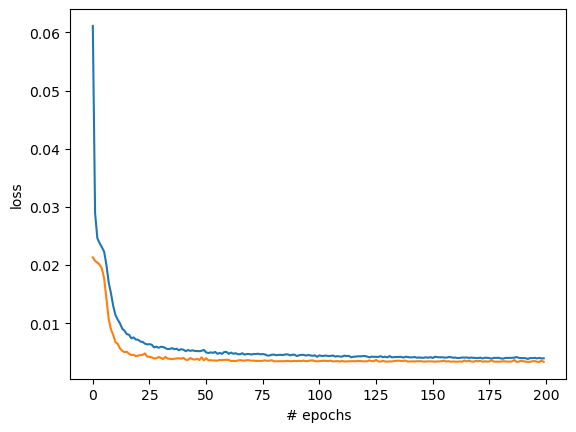

In [47]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

# **Problem of Overfitting**

## Solutions,

1. Early Stopping
2. Dropout Layers
3. Batch Normalization
4. Reguralization
5. Reduce the Complexity
6. Data Augmentation

In [54]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

42/42 [==============================] - 0s 2ms/step
r2 score: 0.8440533237490907


In [55]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.0926143  0.2028136  0.28604924 0.27315358 0.3024619  0.15474795
  0.01875733 0.010551   0.003517   0.44196952]]
predicted: [[0.15379079 0.1670291  0.2583771  0.40140602 0.30028906 0.21722816
  0.03442509 0.01836408 0.01093484 0.3497933 ]]


In [56]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 8.  17.4 24.5 23.4 25.9 13.3  1.7  1.   0.4 37.8]]
predicted inverse scaled: [[13.218354  14.347582  22.139566  34.339935  25.714657  18.629562
   3.0364604  1.6664562  1.0327419 29.937366 ]]


In [57]:
my_test_data=[1,56,156,42,0,1,0]
my_test_data=scaler_data.transform([my_test_data])
result=model.predict(my_test_data)
actual=7
predicted = scaler_target.inverse_transform(result)

print('Actual Result:',actual)
print('Predicted Result:',predicted)

1/1 [==============================] - 0s 42ms/step
Actual Result: 7
Predicted Result: [[2.8726802]]


In [58]:
test_data = np.array([0,63,186,46,1,1,0]).reshape(1,-1)
scaled_test_data = scaler_data.transform(test_data)
result = model.predict(scaled_test_data)
print(result)

1/1 [==============================] - 0s 63ms/step
[[0.23210408]]


In [59]:
scaler_target.inverse_transform(result)

array([[19.898478]], dtype=float32)

# **Save all the models**

In [60]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']

In [61]:
model.save('Heart Risk Level Prediction model.h5')

c:\Users\laksh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
